In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
# !pip install qiskit-experiments

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 29.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.18
    Uninstalling urllib3-1.26.18:
      Successfully uninstalled urllib3-1.26.18
ERROR: pip's de

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer, noise, AerSimulator
from qiskit_aer.noise import depolarizing_error, NoiseModel
from qiskit.quantum_info import state_fidelity, Statevector, DensityMatrix, partial_trace
# from qiskit_experiments.library import StateTomography
# from qiskit_experiments.framework import ExperimentData

# from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_ibm_runtime import QiskitRuntimeService

# Loading your IBM Quantum account(s)
provider = QiskitRuntimeService(channel="ibm_quantum", token="786ab83c1f9b5535280b9414b2ba912efd79cf4264ccabab0982b47ca2fa4a9460f8994e175a00654be48b678cdbbb65d5a7276a8a0e36edbc761fcf22016aa6")

qiskit_runtime_service.__init__:INFO:2024-10-20 20:57:43,480: Default instance: ibm-q/open/main


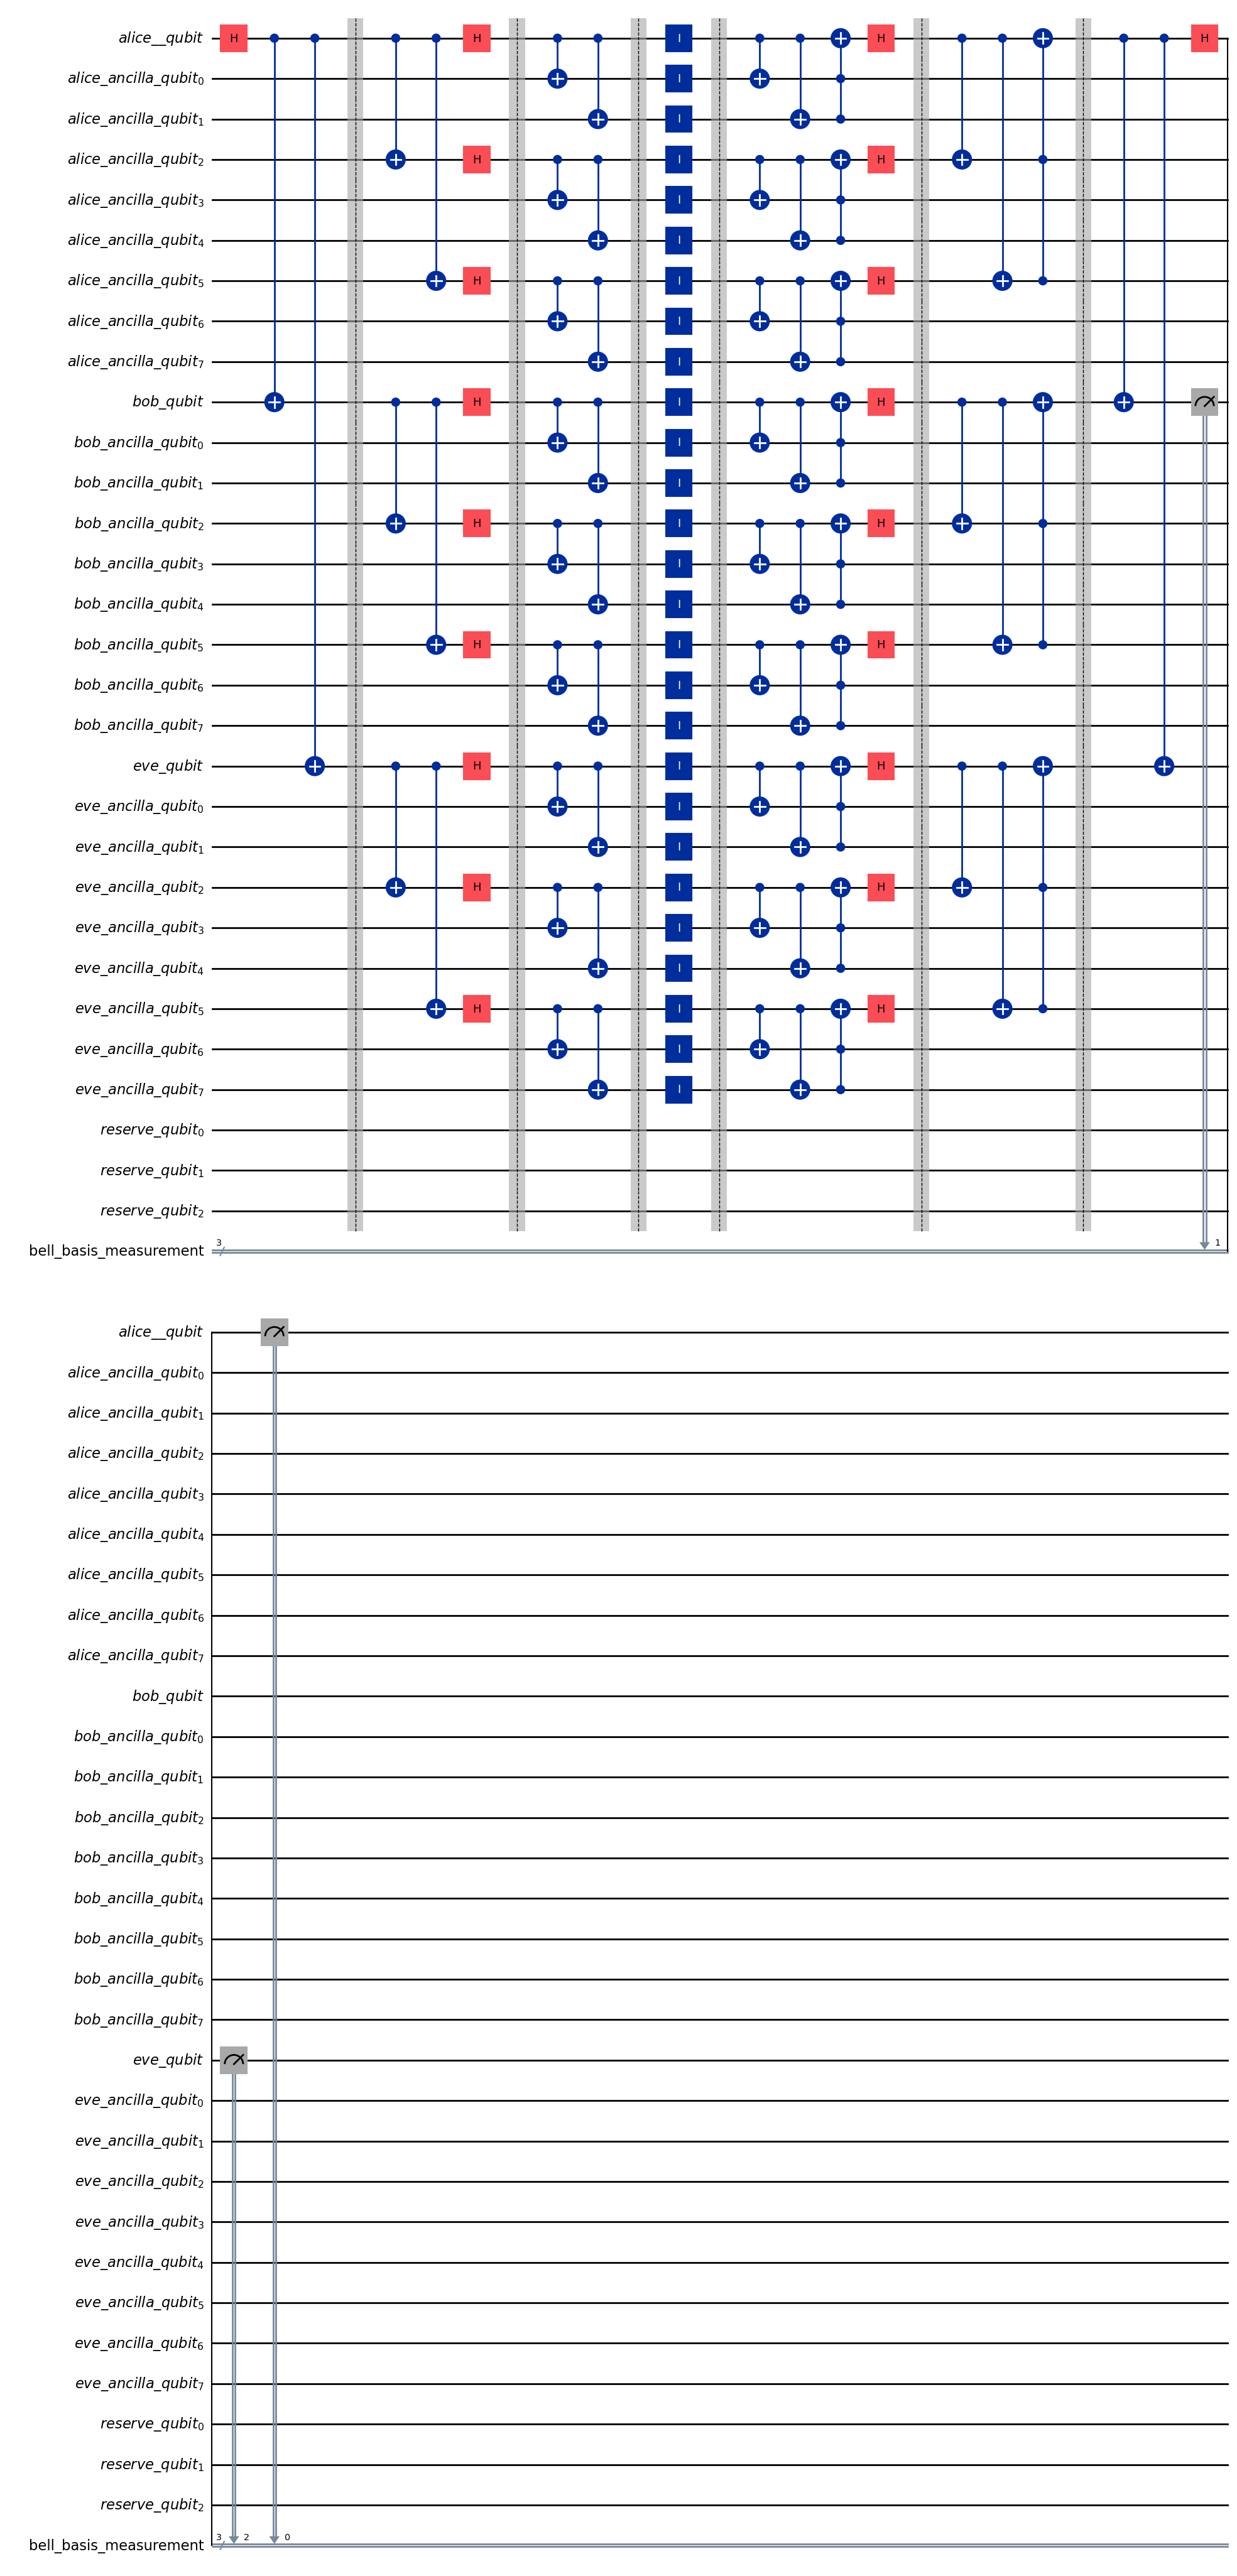

In [3]:
# 9 bit Shor on a bell state

cr = ClassicalRegister(3,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(8, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(8, 'bob_ancilla_qubit')
eve = QuantumRegister(1, 'eve_qubit')
aq3 = QuantumRegister(8, 'eve_ancilla_qubit')
aq4 = QuantumRegister(3, 'reserve_qubit')

shor9 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

shor9.h(0)
shor9.cx(alice,bob)
shor9.cx(alice,eve)
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])

shor9.cx(eve, aq3[2])
shor9.cx(eve, aq3[5])

shor9.h([0,3,6,9,12,15,18,21,24])
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])

shor9.cx(eve,aq3[0])
shor9.cx(eve,aq3[1])
shor9.cx(aq3[2],aq3[3])
shor9.cx(aq3[2],aq3[4])
shor9.cx(aq3[5],aq3[6])
shor9.cx(aq3[5],aq3[7])
shor9.barrier()

shor9.id(range(shor9.num_qubits-3))
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.mcx([1,2],0)
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.mcx([4,5],3)
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])
shor9.mcx([7,8],6)

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.mcx([10,11],9)
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.mcx([13,14],12)
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.mcx([16,17],15)

shor9.cx(eve,aq3[0])
shor9.cx(eve,aq3[1])
shor9.mcx([19,20],18)
shor9.cx(aq3[2],aq3[3])
shor9.cx(aq3[2],aq3[4])
shor9.mcx([22,23],21)
shor9.cx(aq3[5],aq3[6])
shor9.cx(aq3[5],aq3[7])
shor9.mcx([25,26],24)

shor9.h([0,3,6,9,12,15,18,21,24])
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])
shor9.mcx([3,6],0)

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])
shor9.mcx([12,15],9)

shor9.cx(eve, aq3[2])
shor9.cx(eve, aq3[5])
shor9.mcx([21,24],18)
shor9.barrier()

shor9.cx(alice,bob)
shor9.cx(alice,eve)
shor9.h(0)

shor9.measure([alice[0], bob[0], eve[0]],cr)
shor9.draw(output='mpl')

In [4]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities = []

In [5]:
for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(shor9, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['000']
    fidelities.append(fidelity)

{'000': 300.0}
{'000': 300.0}
{'100': 0.06666666666666667, '001': 0.13333333333333333, '000': 299.8}
{'100': 0.2, '110': 0.4, '001': 0.5333333333333333, '000': 298.53333333333336, '010': 0.3333333333333333}
{'100': 0.6, '001': 1.1333333333333333, '110': 1.3333333333333333, '010': 1.4, '011': 0.06666666666666667, '000': 295.46666666666664}
{'100': 3.2, '001': 2.933333333333333, '110': 2.0, '101': 0.13333333333333333, '010': 2.533333333333333, '111': 0.13333333333333333, '011': 0.13333333333333333, '000': 288.93333333333334}
{'100': 5.866666666666666, '001': 5.733333333333333, '110': 4.066666666666666, '101': 0.3333333333333333, '010': 5.4, '111': 0.13333333333333333, '011': 0.4, '000': 278.06666666666666}
{'100': 7.733333333333333, '001': 11.0, '110': 9.466666666666667, '101': 0.5333333333333333, '010': 8.866666666666667, '111': 0.6, '011': 0.6666666666666666, '000': 261.1333333333333}
{'100': 12.733333333333333, '001': 15.666666666666666, '110': 14.2, '101': 1.2, '010': 12.933333333333

In [6]:
print(fidelities)

[1.0, 1.0, 0.9993333333333334, 0.9951111111111112, 0.9848888888888888, 0.9631111111111111, 0.9268888888888889, 0.8704444444444445, 0.7991111111111111, 0.7155555555555555, 0.6168888888888889, 0.516, 0.45111111111111113, 0.3482222222222222, 0.27222222222222225, 0.22177777777777777, 0.18666666666666668, 0.14822222222222223, 0.13666666666666666, 0.13111111111111112, 0.1257777777777778, 0.12422222222222222, 0.1248888888888889, 0.12844444444444444, 0.12866666666666668, 0.11377777777777777, 0.12822222222222224, 0.12822222222222224, 0.12155555555555556, 0.11466666666666667]


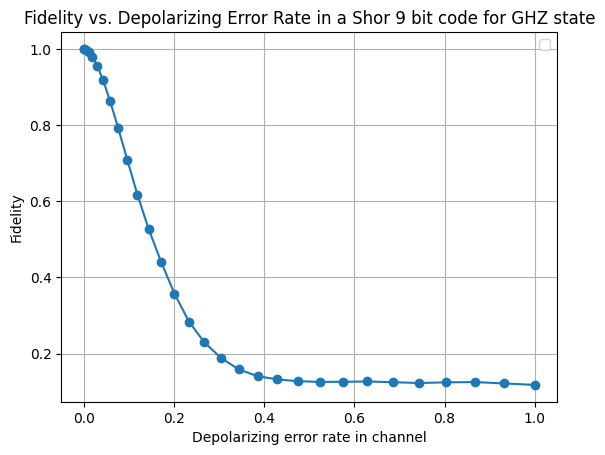

In [7]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 9 bit code for GHZ state')
grid()
legend()

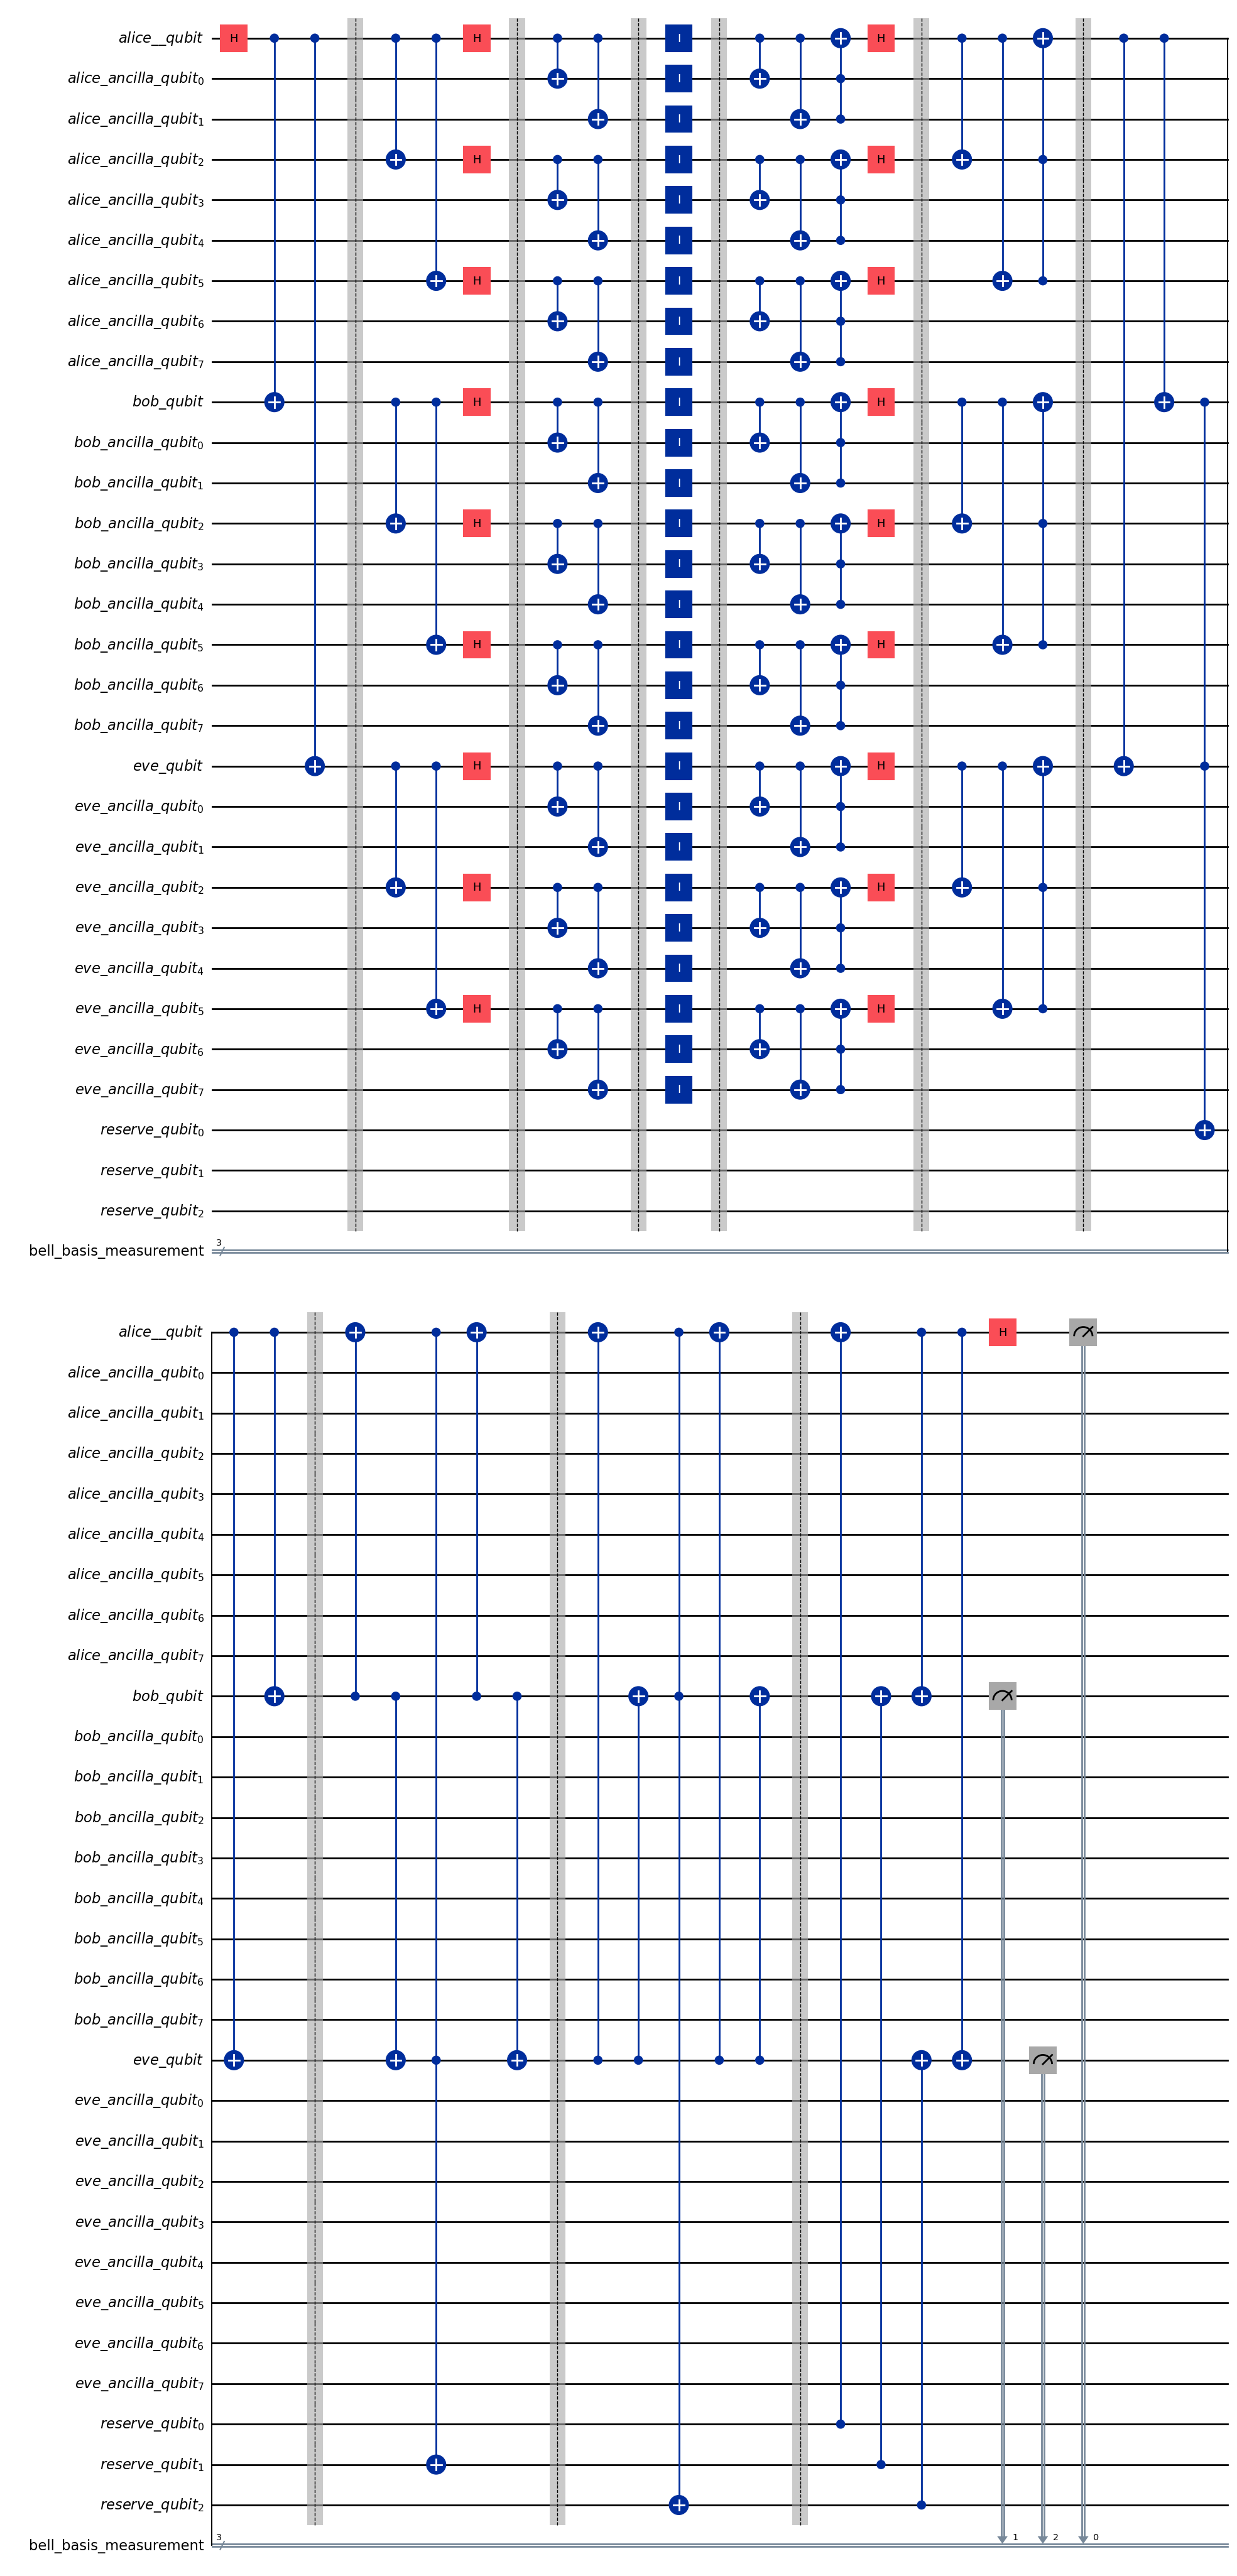

In [7]:
# Modified 9 bit Shor on a GHZ state

cr = ClassicalRegister(3,"bell_basis_measurement")
alice = QuantumRegister(1, 'alice__qubit')
aq1 = QuantumRegister(8, 'alice_ancilla_qubit')
bob = QuantumRegister(1, 'bob_qubit')
aq2 = QuantumRegister(8, 'bob_ancilla_qubit')
eve = QuantumRegister(1, 'eve_qubit')
aq3 = QuantumRegister(8, 'eve_ancilla_qubit')
aq4 = QuantumRegister(3, 'reserve_qubit')

shor9 = QuantumCircuit(alice,aq1,bob,aq2,eve,aq3,aq4,cr)

shor9.h(0)
shor9.cx(alice,bob)
shor9.cx(alice,eve)
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])

shor9.cx(eve, aq3[2])
shor9.cx(eve, aq3[5])

shor9.h([0,3,6,9,12,15,18,21,24])
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])

shor9.cx(eve,aq3[0])
shor9.cx(eve,aq3[1])
shor9.cx(aq3[2],aq3[3])
shor9.cx(aq3[2],aq3[4])
shor9.cx(aq3[5],aq3[6])
shor9.cx(aq3[5],aq3[7])
shor9.barrier()

shor9.id(range(shor9.num_qubits-3))
shor9.barrier()

shor9.cx(alice,aq1[0])
shor9.cx(alice,aq1[1])
shor9.mcx([1,2],0)
shor9.cx(aq1[2],aq1[3])
shor9.cx(aq1[2],aq1[4])
shor9.mcx([4,5],3)
shor9.cx(aq1[5],aq1[6])
shor9.cx(aq1[5],aq1[7])
shor9.mcx([7,8],6)

shor9.cx(bob,aq2[0])
shor9.cx(bob,aq2[1])
shor9.mcx([10,11],9)
shor9.cx(aq2[2],aq2[3])
shor9.cx(aq2[2],aq2[4])
shor9.mcx([13,14],12)
shor9.cx(aq2[5],aq2[6])
shor9.cx(aq2[5],aq2[7])
shor9.mcx([16,17],15)

shor9.cx(eve,aq3[0])
shor9.cx(eve,aq3[1])
shor9.mcx([19,20],18)
shor9.cx(aq3[2],aq3[3])
shor9.cx(aq3[2],aq3[4])
shor9.mcx([22,23],21)
shor9.cx(aq3[5],aq3[6])
shor9.cx(aq3[5],aq3[7])
shor9.mcx([25,26],24)

shor9.h([0,3,6,9,12,15,18,21,24])
shor9.barrier()

shor9.cx(alice,aq1[2])
shor9.cx(alice,aq1[5])
shor9.mcx([3,6],0)

shor9.cx(bob, aq2[2])
shor9.cx(bob, aq2[5])
shor9.mcx([12,15],9)

shor9.cx(eve, aq3[2])
shor9.cx(eve, aq3[5])
shor9.mcx([21,24],18)
shor9.barrier()

shor9.cx(alice,eve)
shor9.cx(alice,bob)
shor9.ccx(bob, eve, aq4[0])
shor9.cx(alice,eve)
shor9.cx(alice,bob)
shor9.barrier()

shor9.cx(bob,alice)
shor9.cx(bob,eve)
shor9.ccx(alice, eve, aq4[1])
shor9.cx(bob,alice)
shor9.cx(bob,eve)
shor9.barrier()

shor9.cx(eve,alice)
shor9.cx(eve,bob)
shor9.ccx(alice, bob, aq4[2])
shor9.cx(eve,alice)
shor9.cx(eve,bob)
shor9.barrier()


shor9.cx(aq4[0],alice)
shor9.cx(aq4[1],bob)
shor9.cx(aq4[2],eve)
shor9.cx(alice,bob)
shor9.cx(alice,eve)
shor9.h(0)

shor9.measure([alice[0], bob[0], eve[0]],cr)
shor9.draw(output='mpl')

In [8]:
shor9.draw(output='mpl').savefig("Modified Shor 9 bit Code on GHZ state.png",dpi=400,bbox_inches="tight")

In [9]:
# Range of noise levels for one-qubit gates
noise_prob = np.square(np.linspace(0,1,30))
params = 4*noise_prob/3
fidelities2 = []

In [10]:
for param in params:
    # Create a new noise model with varying one-qubit depolarizing noise
    noise_model = NoiseModel()
    depol_error = depolarizing_error(param, 1)
    
    noise_model.add_all_qubit_quantum_error(depol_error, 'id')
    
    simulator = AerSimulator(method='matrix_product_state')
    circuit = transpile(shor9, simulator,optimization_level=0)

    # Get and print the result
    counts = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
    for i in range(14):
        count = simulator.run(circuit,noise_model=noise_model,shots=300).result().get_counts()
        counts = {key: count.get(key,0) + counts.get(key,0) for key in set(count) | set(counts)}

    counts = {key: counts[key] / 15 for key in counts}
    print(counts)
    probabilities = {key: count / 300 for key, count in counts.items()}
    
    # Calculate fidelity
    fidelity = probabilities['000']
    fidelities2.append(fidelity)

{'000': 300.0}
{'000': 300.0}
{'001': 0.06666666666666667, '000': 299.93333333333334}
{'001': 0.4666666666666667, '000': 299.53333333333336}
{'001': 0.9333333333333333, '000': 299.06666666666666}
{'001': 3.4, '000': 296.6}
{'001': 6.466666666666667, '000': 293.53333333333336}
{'001': 12.866666666666667, '000': 287.1333333333333}
{'001': 20.533333333333335, '000': 279.46666666666664}
{'001': 29.466666666666665, '000': 270.53333333333336}
{'001': 41.93333333333333, '000': 258.06666666666666}
{'001': 60.06666666666667, '000': 239.93333333333334}
{'001': 75.2, '000': 224.8}
{'001': 94.13333333333334, '000': 205.86666666666667}
{'001': 105.93333333333334, '000': 194.06666666666666}
{'001': 120.4, '000': 179.6}
{'001': 131.93333333333334, '000': 168.06666666666666}
{'001': 139.46666666666667, '000': 160.53333333333333}
{'001': 146.46666666666667, '000': 153.53333333333333}
{'001': 147.66666666666666, '000': 152.33333333333334}
{'001': 147.0, '000': 153.0}
{'001': 153.0, '000': 147.0}
{'001':

In [13]:
print(fidelities2)

[1.0, 1.0, 0.9997777777777778, 0.9984444444444446, 0.9968888888888888, 0.9886666666666667, 0.9784444444444446, 0.9571111111111111, 0.9315555555555555, 0.9017777777777779, 0.8602222222222222, 0.7997777777777778, 0.7493333333333334, 0.6862222222222223, 0.6468888888888888, 0.5986666666666667, 0.5602222222222222, 0.5351111111111111, 0.5117777777777778, 0.5077777777777778, 0.51, 0.49, 0.4951111111111111, 0.5031111111111112, 0.5095555555555555, 0.4984444444444444, 0.5153333333333333, 0.5022222222222222, 0.5051111111111111, 0.5166666666666667]


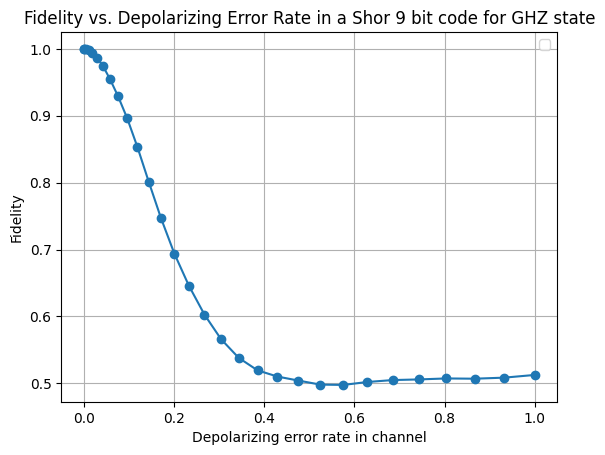

In [14]:
# Plot the fidelity graph
plot(noise_prob, gaussian_filter1d(fidelities2, sigma=1), marker='o')
xlabel('Depolarizing error rate in channel')
ylabel('Fidelity')
title('Fidelity vs. Depolarizing Error Rate in a Shor 9 bit code for GHZ state')
grid()
legend()